In [1]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# root_dir = '/content/drive/My Drive/Colab Notebooks/Presentation20062024/ANNOTATION_ANNOTATEURICES'
# output_dir = '/content/drive/My Drive/Colab Notebooks/Presentation20062024/6500Tok_ANNOTATION_MISLABELLING'

root_dir = '../ANNOTATION_ANNOTATEURICES'
output_dir = '../6500Tok_ANNOTATION_MISLABELLING_27102024'

# Création du dossier de sortie s'il n'existe pas
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [ ]:
# Initialiser les compteurs globaux
total_en = 0
vp_count = 0
fn_count = 0
fp_na_count = 0
fp_label_error_count = 0
fp_na_labels = {}
fp_label_error_labels = {}

# Fonction pour traiter chaque fichier CSV
def process_csv_file(file_path, max_tokens=6500):
    global total_en, vp_count, fn_count, fp_na_count, fp_label_error_count, fp_na_labels, fp_label_error_labels

    token_counter = 0
    with open(file_path, 'r', encoding='utf-8') as file:
        reader = csv.DictReader(file, delimiter=';')

        for row in reader:
            if token_counter >= max_tokens:
                break

            token = row['Token']
            label = row['Label']
            correction = row['Correction']

            if label or correction:
                total_en += 1
                token_counter += 1

                if correction and correction != 'NA' and not label:
                    fn_count += 1
                elif not correction and label:
                    vp_count += 1
                elif correction and label:
                    if correction == 'NA':
                        fp_na_count += 1
                        if label in fp_na_labels:
                            fp_na_labels[label] += 1
                        else:
                            fp_na_labels[label] = 1
                    else:
                        fp_label_error_count += 1
                        if label in fp_label_error_labels:
                            fp_label_error_labels[label] += 1
                        else:
                            fp_label_error_labels[label] = 1

# Parcourir récursivement le dossier principal et ses sous-dossiers
for subdir, dirs, files in os.walk(root_dir):
    for file in files:
        print(file)
        if file.endswith('.csv'):
            file_path = os.path.join(subdir, file)
            process_csv_file(file_path)

# Calcul des proportions
vp_proportion = vp_count / total_en if total_en else 0
fn_proportion = fn_count / total_en if total_en else 0
fp_proportion = (fp_na_count + fp_label_error_count) / total_en if total_en else 0

# Vérification pour éviter les erreurs si toutes les proportions sont nulles
if sum([vp_proportion, fn_proportion, fp_proportion]) == 0:
    print("Avertissement : Toutes les proportions sont nulles. Impossible de créer le camembert.")
else:
    # Création du camembert
    labels_total = ['VP', 'FN', 'FP']
    sizes_total = [vp_proportion, fn_proportion, fp_proportion]
    colors_total = ['#66b3ff', '#ff9999', '#ffcc99']
    explode_total = (0.1, 0, 0)  # "explode" la première partie

    plt.figure(figsize=(6, 6))
    plt.pie(sizes_total, explode=explode_total, labels=labels_total, colors=colors_total, autopct='%1.1f%%',
            shadow=True, startangle=140)
    plt.axis('equal')

    # Enregistrer le camembert
    plt.savefig(os.path.join(output_dir, '6500tok-proportions-EN-global.png'))
    plt.show()

In [ ]:
# Initialiser les compteurs globaux
total_en = 0
vp_count = 0
fn_count = 0
fp_na_count = 0
fp_label_error_count = 0
fp_na_labels = {}
fp_label_error_labels = {}

# Fonction pour traiter chaque fichier CSV
def process_csv_file(file_path, max_tokens=6500):
    global total_en, vp_count, fn_count, fp_na_count, fp_label_error_count, fp_na_labels, fp_label_error_labels

    token_counter = 0
    with open(file_path, 'r', encoding='utf-8') as file:
        reader = csv.DictReader(file, delimiter=';')

        for row in reader:
            if token_counter >= max_tokens:
                break

            token = row['Token']
            label = row['Label']
            correction = row['Correction']

            if label or correction:
                total_en += 1
                token_counter += 1

                if correction and correction != 'NA' and not label:
                    fn_count += 1
                elif not correction and label:
                    vp_count += 1
                elif correction and label:
                    if correction == 'NA':
                        fp_na_count += 1
                        if label in fp_na_labels:
                            fp_na_labels[label] += 1
                        else:
                            fp_na_labels[label] = 1
                    else:
                        fp_label_error_count += 1
                        if label in fp_label_error_labels:
                            fp_label_error_labels[label] += 1
                        else:
                            fp_label_error_labels[label] = 1

# Parcourir récursivement le dossier principal et ses sous-dossiers
for subdir, dirs, files in os.walk(root_dir):
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(subdir, file)
            process_csv_file(file_path)

# Calcul des proportions des FP
total_fp = fp_na_count + fp_label_error_count
fp_na_proportion = fp_na_count / total_fp if total_fp else 0
fp_label_error_proportion = fp_label_error_count / total_fp if total_fp else 0

# Création des listes pour les labels et les sizes correspondants
labels_fp = list(fp_na_labels.keys()) + list(fp_label_error_labels.keys())
sizes_fp = list(fp_na_labels.values()) + list(fp_label_error_labels.values())
colors_fp = ['#99ff99'] * len(fp_na_labels) + ['#ffcc99'] * len(fp_label_error_labels)

# Vérification pour éviter les erreurs si toutes les proportions sont nulles
if sum([fp_na_proportion, fp_label_error_proportion]) == 0:
    print("Avertissement : Toutes les proportions sont nulles. Impossible de créer le camembert.")
else:
    # Création du camembert
    fig, ax = plt.subplots(figsize=(6, 6))
    # Added autopct parameter to display percentages
    wedges, texts, autotexts = ax.pie(sizes_fp, startangle=140, colors=colors_fp, wedgeprops=dict(edgecolor='w'), autopct='%1.1f%%')

    # Ajout des annotations pour les labels initiaux
    for i, label in enumerate(labels_fp):
        autotexts[i].set_text(f'{label}: {autotexts[i].get_text()}')

    # Ajout de la légende
    legend_labels = ['FP: non entité', 'FP: entité mal labellisée']
    ax.legend([wedges[0], wedges[len(fp_na_labels)]], legend_labels, loc="best")
    ax.axis('equal')

    # Enregistrer le camembert
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, '6500tok-proportions-fp-labels-global.png'))
    plt.show()

In [ ]:
# Initialiser les compteurs globaux
def init_counters():
    return {
        'total_en': 0,
        'vp_count': 0,
        'fn_count': 0,
        'fp_na_count': 0,
        'fp_label_error_count': 0,
        'fp_na_labels': {},
        'fp_label_error_labels': {}
    }

# Fonction pour traiter chaque fichier CSV
def process_csv_file(file_path, counters, max_tokens=6500):
    token_counter = 0
    with open(file_path, 'r', encoding='utf-8') as file:
        reader = csv.DictReader(file, delimiter=';')

        for row in reader:
            if token_counter >= max_tokens:
                break

            token = row['Token']
            label = row['Label']
            correction = row['Correction']

            if label or correction:
                counters['total_en'] += 1
                token_counter += 1

                if correction and correction != 'NA' and not label:
                    counters['fn_count'] += 1
                elif not correction and label:
                    counters['vp_count'] += 1
                elif correction and label:
                    if correction == 'NA':
                        counters['fp_na_count'] += 1
                        if label in counters['fp_na_labels']:
                            counters['fp_na_labels'][label] += 1
                        else:
                            counters['fp_na_labels'][label] = 1
                    else:
                        counters['fp_label_error_count'] += 1
                        if label in counters['fp_label_error_labels']:
                            counters['fp_label_error_labels'][label] += 1
                        else:
                            counters['fp_label_error_labels'][label] = 1

# Fonction pour créer un camembert
def create_pie_chart(counters, output_path):
    total_en = counters['total_en']
    vp_proportion = counters['vp_count'] / total_en if total_en else 0
    fn_proportion = counters['fn_count'] / total_en if total_en else 0
    fp_proportion = (counters['fp_na_count'] + counters['fp_label_error_count']) / total_en if total_en else 0

    # Vérification pour éviter les erreurs si toutes les proportions sont nulles
    if sum([vp_proportion, fn_proportion, fp_proportion]) == 0:
        print(f"Avertissement : Toutes les proportions sont nulles pour {output_path}. Impossible de créer le camembert.")
    else:
        # Création du camembert
        labels_total = ['VP', 'FN', 'FP']
        sizes_total = [vp_proportion, fn_proportion, fp_proportion]
        colors_total = ['#66b3ff', '#ff9999', '#ffcc99']
        explode_total = (0.1, 0, 0)  # "explode" la première partie

        plt.figure(figsize=(6, 6))
        plt.pie(sizes_total, explode=explode_total, labels=labels_total, colors=colors_total, autopct='%1.1f%%',
                shadow=True, startangle=140)
        plt.axis('equal')

        # Enregistrer le camembert
        plt.savefig(output_path)
        plt.show()

# Traitement pour chaque configuration
def process_annotations(author=None, tool=None):
    counters = init_counters()
    for subdir, dirs, files in os.walk(root_dir):
        for file in files:
            if file.endswith('.csv'):
                file_path = os.path.join(subdir, file)
                if author and author not in file_path:
                    continue
                if tool and tool not in file_path:
                    continue
                process_csv_file(file_path, counters)
    return counters

# Générer les camemberts pour DAUDET et CARRAUD
authors = ['DAUDET', 'CARRAUD']
for author in authors:
    counters = process_annotations(author=author)
    create_pie_chart(counters, os.path.join(output_dir, f'6500tok-proportions-EN_{author}.png'))

# Générer les camemberts pour chaque outil utilisé par DAUDET et CARRAUD
tools = ['Kraken-base_spaCy3.7.2-lg', 'REF_spaCy3.7.2-lg', 'TesseractFra-PNG_spaCy3.7.2-lg']
for author in authors:
    for tool in tools:
        counters = process_annotations(author=author, tool=tool)
        create_pie_chart(counters, os.path.join(output_dir, f'6500tok-proportions-EN_{author}_{tool}.png'))

In [15]:
import seaborn as sns
sns.set_theme(style="darkgrid")

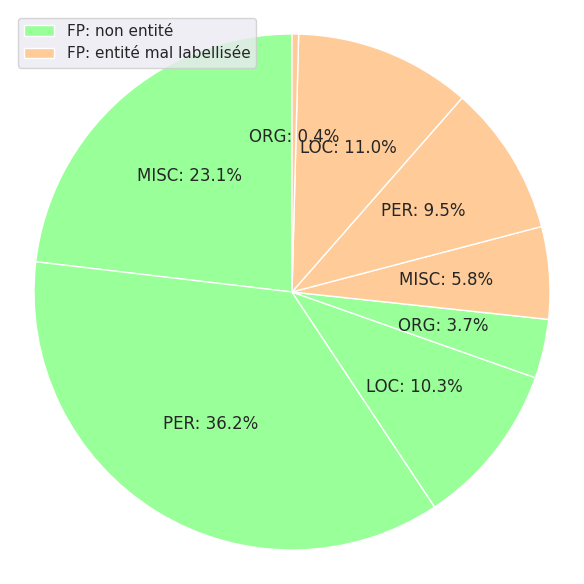

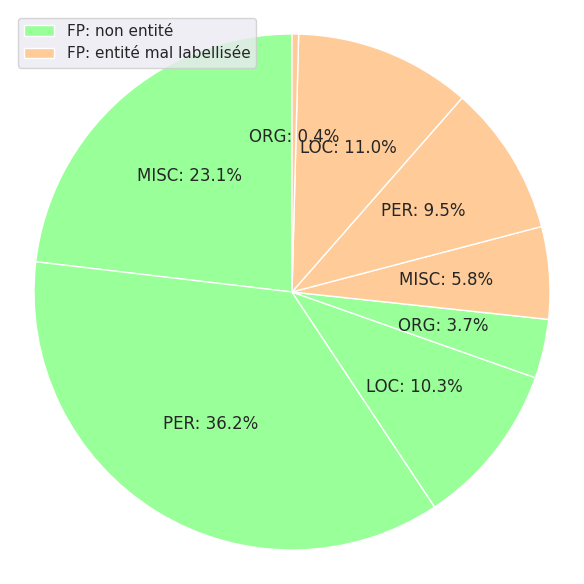

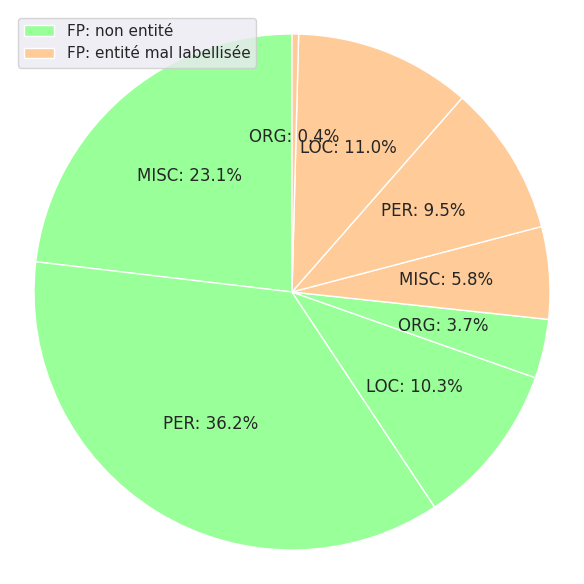

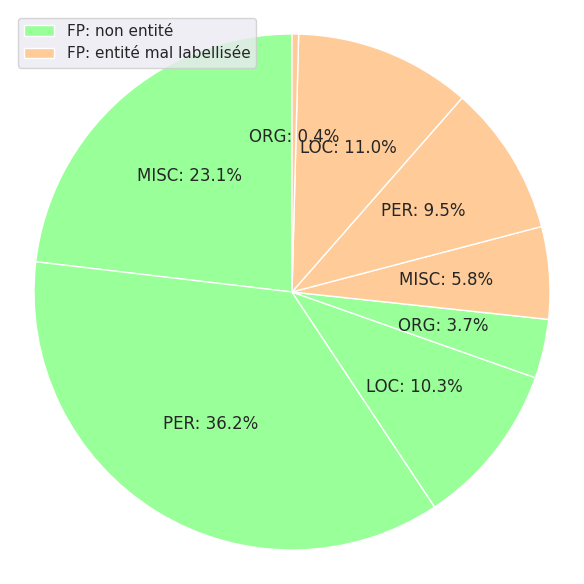

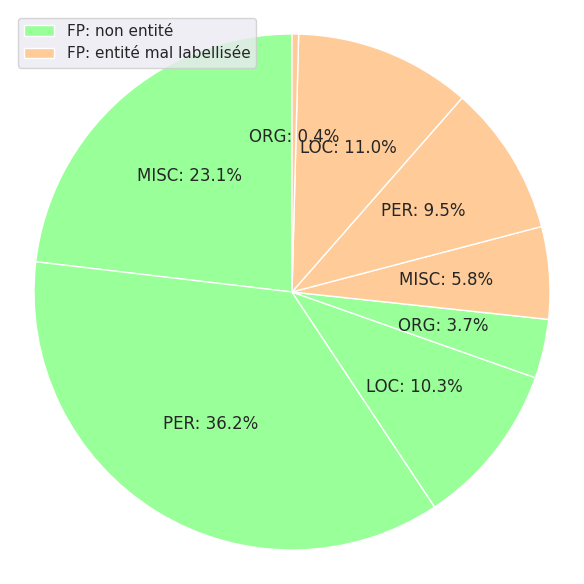

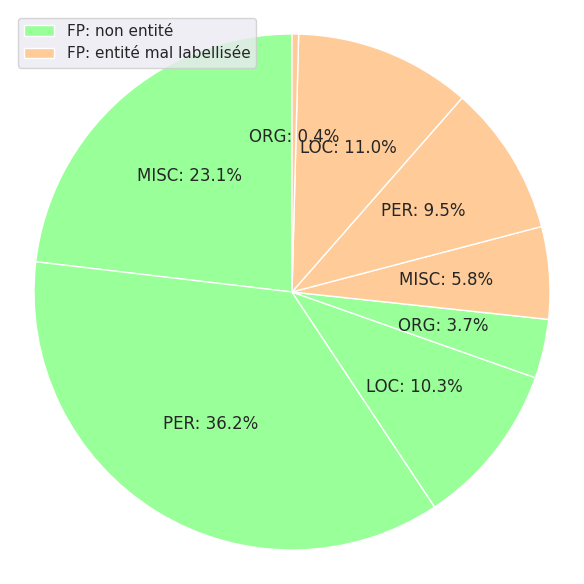

In [18]:
# Initialiser les compteurs globaux
def init_counters():
    return {
        'total_en': 0,
        'vp_count': 0,
        'fn_count': 0,
        'fp_na_count': 0,
        'fp_label_error_count': 0,
        'fp_na_labels': {},
        'fp_label_error_labels': {}
    }

# Fonction pour traiter chaque fichier CSV
def process_csv_file(file_path, counters, max_tokens=6500):
    token_counter = 0
    with open(file_path, 'r', encoding='utf-8') as file:
        reader = csv.DictReader(file, delimiter=';')

        for row in reader:
            if token_counter >= max_tokens:
                break

            token = row['Token']
            label = row['Label']
            correction = row['Correction']

            if label or correction:
                counters['total_en'] += 1
                token_counter += 1

                if correction and correction != 'NA' and not label:
                    counters['fn_count'] += 1
                elif not correction and label:
                    counters['vp_count'] += 1
                elif correction and label:
                    if correction == 'NA':
                        counters['fp_na_count'] += 1
                        if label in counters['fp_na_labels']:
                            counters['fp_na_labels'][label] += 1
                        else:
                            counters['fp_na_labels'][label] = 1
                    else:
                        counters['fp_label_error_count'] += 1
                        if label in counters['fp_label_error_labels']:
                            counters['fp_label_error_labels'][label] += 1
                        else:
                            counters['fp_label_error_labels'][label] = 1

# Fonction pour créer un camembert des FP
def create_fp_pie_chart(counters, output_path):
    total_fp = counters['fp_na_count'] + counters['fp_label_error_count']
    fp_na_proportion = counters['fp_na_count'] / total_fp if total_fp else 0
    fp_label_error_proportion = counters['fp_label_error_count'] / total_fp if total_fp else 0

    labels_fp = list(counters['fp_na_labels'].keys()) + list(counters['fp_label_error_labels'].keys())
    sizes_fp = list(counters['fp_na_labels'].values()) + list(counters['fp_label_error_labels'].values())
    colors_fp = ['#99ff99'] * len(counters['fp_na_labels']) + ['#ffcc99'] * len(counters['fp_label_error_labels'])

    # Vérification pour éviter les erreurs si toutes les proportions sont nulles
    if sum([fp_na_proportion, fp_label_error_proportion]) == 0:
        print(f"Avertissement : Toutes les proportions sont nulles pour {output_path}. Impossible de créer le camembert.")
    else:
        # Création du camembert
        fig, ax = plt.subplots(figsize=(6, 6))
        wedges, texts, autotexts = ax.pie(sizes_fp, startangle=90, colors=colors_fp, wedgeprops=dict(edgecolor='w'), autopct='%1.1f%%')

        # Ajout des annotations pour les labels initiaux
        for i, label in enumerate(labels_fp):
            autotexts[i].set_text(f'{label}: {autotexts[i].get_text()}')

        # Ajout de la légende
        legend_labels = ['FP: non entité', 'FP: entité mal labellisée']
        ax.legend([wedges[0], wedges[len(counters['fp_na_labels'])]], legend_labels, loc="best")
        ax.axis('equal')

        # Enregistrer le camembert
        plt.tight_layout()
        plt.savefig(output_path, dpi = 300)
        plt.show()

# Traitement pour chaque configuration
def process_annotations(author=None, tool=None, max_tokens=6500):
    counters = init_counters()
    for subdir, dirs, files in os.walk(root_dir):
        for file in files:
            if file.endswith('.csv'):
                file_path = os.path.join(subdir, file)
                if author and author not in file_path:
                    continue
                if tool and tool not in file_path:
                    continue
                process_csv_file(file_path, counters, max_tokens)
    return counters

# Générer les camemberts pour DAUDET et CARRAUD
authors = ['DAUDET', 'CARRAUD']
for author in authors:
    counters = process_annotations(author=author)
    # create_fp_pie_chart(counters, os.path.join(output_dir, f'6500tok-proportions-fp-labels_{author}.png'))

# Générer les camemberts pour chaque outil utilisé par DAUDET et CARRAUD
tools = ['Kraken-base_spaCy3.7.2-lg', 'REF_spaCy3.7.2-lg', 'TesseractFra-PNG_spaCy3.7.2-lg']
for author in authors:
    for tool in tools:
        # print(tool)
        # counters = process_annotations(author=author, tool=tool)
        # print(counters)
        # df = pd.DataFrame(counters)
        # print(df)
        # sns.displot(df, x="fp_label_error_count", hue="fp_label_error_labels", element="step")
        create_fp_pie_chart(counters, os.path.join(output_dir, f'6500tok-proportions-fp-labels_{author}_{tool}.png'))